<a href="https://colab.research.google.com/github/victorhgalves/cyclesharingco/blob/main/Exploratory_Cycle_Sharing_CO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import Libs

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import csv
import matplotlib.pyplot as plt
import folium
import datetime
import warnings

from sklearn.preprocessing import LabelEncoder

sns.set_theme(style="darkgrid")
warnings.filterwarnings("ignore")

#Import Data

In [ ]:
df_station = pd.read_csv('input/station.csv', error_bad_lines=False)
df_trip = pd.read_csv('input/trip.csv', error_bad_lines=False)
df_weather = pd.read_csv('input/weather.csv', error_bad_lines=False)

b'Skipping line 50794: expected 12 fields, saw 20\n'


#Pre Processing

In [ ]:
df_trip.shape

(286857, 12)

In [ ]:
df_station.shape

(58, 9)

In [ ]:
df_weather.shape

(689, 21)

In [ ]:
df_trip.dtypes

trip_id                int64
starttime             object
stoptime              object
bikeid                object
tripduration         float64
from_station_name     object
to_station_name       object
from_station_id       object
to_station_id         object
usertype              object
gender                object
birthyear            float64
dtype: object

In [ ]:
dict_type_trip = {
    'trip_id' : 'str',
    'starttime' : 'datetime64',
    'stoptime' : 'datetime64',
    'bikeid' : 'str',
    'tripduration' : np.float64,
    'from_station_name' : 'str',
    'to_station_name' : 'str',
    'from_station_id' : 'str',
    'to_station_id' : 'str',
    'usertype' : 'str',
    'gender' : 'str',
    }

In [ ]:
df_trip = df_trip.astype(dict_type_trip)

In [ ]:
df_trip.dtypes

trip_id                      object
starttime            datetime64[ns]
stoptime             datetime64[ns]
bikeid                       object
tripduration                float64
from_station_name            object
to_station_name              object
from_station_id              object
to_station_id                object
usertype                     object
gender                       object
birthyear                   float64
dtype: object

In [ ]:
df_trip.head(5)

,trip_id,starttime,stoptime,bikeid,tripduration,from_station_name,to_station_name,from_station_id,to_station_id,usertype,gender,birthyear
0,431,2014-10-13 10:31:00,2014-10-13 10:48:00,SEA00298,985.935,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1960.0
1,432,2014-10-13 10:32:00,2014-10-13 10:48:00,SEA00195,926.375,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1970.0
2,433,2014-10-13 10:33:00,2014-10-13 10:48:00,SEA00486,883.831,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Female,1988.0
3,434,2014-10-13 10:34:00,2014-10-13 10:48:00,SEA00333,865.937,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Female,1977.0
4,435,2014-10-13 10:34:00,2014-10-13 10:49:00,SEA00202,923.923,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1971.0


In [ ]:
df_station.head(5)

,station_id,name,lat,long,install_date,install_dockcount,modification_date,current_dockcount,decommission_date
0,BT-01,3rd Ave & Broad St,47.618418,-122.350964,10/13/2014,18,NaN,18,NaN
1,BT-03,2nd Ave & Vine St,47.615829,-122.348564,10/13/2014,16,NaN,16,NaN
2,BT-04,6th Ave & Blanchard St,47.616094,-122.341102,10/13/2014,16,NaN,16,NaN
3,BT-05,2nd Ave & Blanchard St,47.613110,-122.344208,10/13/2014,14,NaN,14,NaN
4,CBD-03,7th Ave & Union St,47.610731,-122.332447,10/13/2014,20,NaN,20,NaN


In [ ]:
df_weather.head(5)

,Date,Max_Temperature_F,Mean_Temperature_F,Min_TemperatureF,Max_Dew_Point_F,MeanDew_Point_F,Min_Dewpoint_F,Max_Humidity,Mean_Humidity,Min_Humidity,Max_Sea_Level_Pressure_In,Mean_Sea_Level_Pressure_In,Min_Sea_Level_Pressure_In,Max_Visibility_Miles,Mean_Visibility_Miles,Min_Visibility_Miles,Max_Wind_Speed_MPH,Mean_Wind_Speed_MPH,Max_Gust_Speed_MPH,Precipitation_In,Events
0,10/13/2014,71,62.0,54,55,51,46,87,68,46,30.03,29.79,29.65,10,10,4,13,4,21,0.00,Rain
1,10/14/2014,63,59.0,55,52,51,50,88,78,63,29.84,29.75,29.54,10,9,3,10,5,17,0.11,Rain
2,10/15/2014,62,58.0,54,53,50,46,87,77,67,29.98,29.71,29.51,10,9,3,18,7,25,0.45,Rain
3,10/16/2014,71,61.0,52,49,46,42,83,61,36,30.03,29.95,29.81,10,10,10,9,4,-,0.00,Rain
4,10/17/2014,64,60.0,57,55,51,41,87,72,46,29.83,29.78,29.73,10,10,6,8,3,-,0.14,Rain


In [ ]:
df_trip['type'] = LabelEncoder().fit_transform(df_trip['usertype'])

In [ ]:
df_trip['gender'].replace({'' : 'NaN'}, inplace=True)

In [ ]:
df_trip.to_csv('output/trip_date.csv')

In [ ]:
df_trip_date = pd.read_csv('output/trip_date.csv',  parse_dates=['Date'], index_col=['Date'])

In [ ]:
df_trip_date.drop('Unnamed: 0', axis=1, inplace=True)

In [ ]:
df_trip['tripduration_minutes'] =  round(df_trip['tripduration'] / 60, 0)

# Data Exploratory

In [ ]:
df_weather.shape

(689, 21)

In [ ]:
df_station.shape

(58, 11)

In [ ]:
df_trip.shape

(286857, 16)

In [ ]:
df_weather.isna().sum()

Date                            0
Max_Temperature_F               0
Mean_Temperature_F              1
Min_TemperatureF                0
Max_Dew_Point_F                 0
MeanDew_Point_F                 0
Min_Dewpoint_F                  0
Max_Humidity                    0
Mean_Humidity                   0
Min_Humidity                    0
Max_Sea_Level_Pressure_In       0
Mean_Sea_Level_Pressure_In      0
Min_Sea_Level_Pressure_In       0
Max_Visibility_Miles            0
Mean_Visibility_Miles           0
Min_Visibility_Miles            0
Max_Wind_Speed_MPH              0
Mean_Wind_Speed_MPH             0
Max_Gust_Speed_MPH            185
Precipitation_In                0
Events                        361
dtype: int64

In [ ]:
df_trip.isna().sum()

trip_id                 0
starttime               0
stoptime                0
bikeid                  0
tripduration            0
from_station_name       0
to_station_name         0
from_station_id         0
to_station_id           0
usertype                0
gender                  0
birthyear               0
age                     0
Date                    0
type                    0
tripduration_minutes    0
dtype: int64

In [ ]:
df_station.isna().sum()

station_id            0
name                  0
lat                   0
long                  0
install_date          0
install_dockcount     0
modification_date    41
current_dockcount     0
decommission_date    54
from_station_id       0
to_station_id         0
dtype: int64

In [ ]:
df_trip.describe()

,tripduration,birthyear,age,type,tripduration_minutes
count,286857.000000,286857.000000,286857.000000,286857.000000,286857.000000
mean,1178.295675,1980.214605,34.907553,0.367082,19.638175
std,2038.458947,8.110558,8.114919,0.482010,33.976089
min,60.008000,1931.000000,16.000000,0.000000,1.000000
25%,387.924000,1981.000000,30.000000,0.000000,6.000000
50%,624.842000,1981.000000,34.000000,0.000000,10.000000
75%,1118.466000,1985.000000,35.000000,1.000000,19.000000
max,28794.398000,1999.000000,85.000000,1.000000,480.000000


In [ ]:
df_weather.describe()

,Max_Temperature_F,Mean_Temperature_F,Min_TemperatureF,Max_Dew_Point_F,MeanDew_Point_F,Min_Dewpoint_F,Max_Humidity,Mean_Humidity,Min_Humidity,Max_Sea_Level_Pressure_In,Mean_Sea_Level_Pressure_In,Min_Sea_Level_Pressure_In,Max_Visibility_Miles,Mean_Visibility_Miles,Min_Visibility_Miles,Max_Wind_Speed_MPH,Mean_Wind_Speed_MPH,Precipitation_In
count,689.000000,688.000000,689.000000,689.000000,689.000000,689.000000,689.000000,689.000000,689.000000,689.000000,689.000000,689.000000,689.000000,689.000000,689.000000,689.000000,689.00000,689.000000
mean,64.027576,56.584302,49.454282,48.571843,45.021771,40.873730,84.541364,68.506531,49.973875,30.121742,30.034761,29.940610,9.989840,9.429608,7.245283,11.085631,4.63135,0.105065
std,12.427843,10.408058,9.451437,7.501230,7.914025,8.854608,9.718948,12.701871,15.825701,0.183367,0.197503,0.221803,0.266679,1.174360,3.281278,3.921087,2.78032,0.235644
min,39.000000,33.000000,23.000000,10.000000,4.000000,1.000000,40.000000,24.000000,15.000000,29.470000,29.310000,29.140000,3.000000,1.000000,0.000000,4.000000,0.00000,0.000000
25%,55.000000,48.000000,43.000000,44.000000,41.000000,36.000000,78.000000,60.000000,38.000000,30.010000,29.930000,29.840000,10.000000,9.000000,4.000000,8.000000,3.00000,0.000000
50%,63.000000,56.000000,50.000000,50.000000,46.000000,42.000000,86.000000,70.000000,50.000000,30.120000,30.040000,29.960000,10.000000,10.000000,9.000000,10.000000,4.00000,0.000000
75%,73.000000,65.000000,57.000000,54.000000,51.000000,47.000000,90.000000,79.000000,63.000000,30.240000,30.160000,30.080000,10.000000,10.000000,10.000000,13.000000,6.00000,0.090000
max,98.000000,83.000000,70.000000,77.000000,59.000000,57.000000,100.000000,95.000000,87.000000,30.860000,30.810000,30.750000,10.000000,10.000000,10.000000,30.000000,23.00000,2.200000


In [ ]:
df_station.describe()

,lat,long,install_dockcount,current_dockcount
count,58.000000,58.000000,58.000000,58.000000
mean,47.624796,-122.327242,17.586207,16.517241
std,0.019066,0.014957,3.060985,5.117021
min,47.598488,-122.355230,12.000000,0.000000
25%,47.613239,-122.338735,16.000000,16.000000
50%,47.618591,-122.328207,18.000000,18.000000
75%,47.627712,-122.316691,18.000000,18.000000
max,47.666145,-122.284119,30.000000,26.000000


In [ ]:
df_trip['gender'].value_counts()

Male      140564
nan       105300
Female     37562
Other       3431
Name: gender, dtype: int64

In [ ]:
df_trip['from_station_id'].value_counts()

WF-01            13054
CH-07            11392
BT-01            10934
CBD-13           10049
SLU-15            9994
                 ...  
UW-01              752
WF-03              160
Pronto shop 2        2
8D OPS 02            2
Pronto shop          1
Name: from_station_id, Length: 61, dtype: int64

In [ ]:
top_10_to = pd.DataFrame(df_trip['to_station_id'].value_counts().nlargest(10)).reset_index()
top_10_to.columns = ['Id','Count']

In [ ]:
top_10_from = pd.DataFrame(df_trip['from_station_id'].value_counts().nlargest(10)).reset_index()
top_10_from.columns = ['Id','Count']

In [ ]:
top_10_from['Id']

0     WF-01
1     CH-07
2     BT-01
3    CBD-13
4    SLU-15
5     CH-02
6     CH-08
7    SLU-01
8     BT-03
9     CH-05
Name: Id, dtype: object

In [ ]:
top_10_to['Id']

0    CBD-13
1     WF-01
2    SLU-15
3     BT-01
4    SLU-07
5     PS-04
6    SLU-04
7    SLU-16
8     WF-04
9    CBD-05
Name: Id, dtype: object

In [ ]:
df_trip['tripduration'].describe()

count    286857.000000
mean       1178.295675
std        2038.458947
min          60.008000
25%         387.924000
50%         624.842000
75%        1118.466000
max       28794.398000
Name: tripduration, dtype: float64

In [ ]:
df_station.head(5)

,station_id,name,lat,long,install_date,install_dockcount,modification_date,current_dockcount,decommission_date,from_station_id,to_station_id
0,BT-01,3rd Ave & Broad St,47.618418,-122.350964,10/13/2014,18,NaN,18,NaN,BT-01,BT-01
1,BT-03,2nd Ave & Vine St,47.615829,-122.348564,10/13/2014,16,NaN,16,NaN,BT-03,BT-03
2,BT-04,6th Ave & Blanchard St,47.616094,-122.341102,10/13/2014,16,NaN,16,NaN,BT-04,BT-04
3,BT-05,2nd Ave & Blanchard St,47.613110,-122.344208,10/13/2014,14,NaN,14,NaN,BT-05,BT-05
4,CBD-03,7th Ave & Union St,47.610731,-122.332447,10/13/2014,20,NaN,20,NaN,CBD-03,CBD-03


In [ ]:
len(df_station['station_id'].unique())

58

In [ ]:
df_station['from_station_id'] = df_station.station_id
df_station['to_station_id'] = df_station.station_id

In [ ]:
from_station = df_station[['lat', 'long','from_station_id']]

In [ ]:
to_station = df_station[['lat', 'long','to_station_id']]

In [ ]:
df_trip['birthyear'].describe()

count    286857.000000
mean       1980.214605
std           8.110558
min        1931.000000
25%        1981.000000
50%        1981.000000
75%        1985.000000
max        1999.000000
Name: birthyear, dtype: float64

In [ ]:
df_trip.birthyear.fillna(value = np.random.randint(1974,1987), inplace=True)

In [ ]:
year = df_trip.starttime

def age(year):
    age = []
    for i in year.index:
        a = str(year[i])
        b = a.split('-')[0]
        c = pd.to_numeric(b)  
        age.append(c.astype(int))
    return age

In [ ]:
ages = age(year)

In [ ]:
df_trip['age'] = ages - df_trip.birthyear
df_trip['age'] = df_trip['age'].astype(int)

In [ ]:
df_trip.columns

Index(['trip_id', 'starttime', 'stoptime', 'bikeid', 'tripduration',
       'from_station_name', 'to_station_name', 'from_station_id',
       'to_station_id', 'usertype', 'gender', 'birthyear', 'age', 'Date',
       'type', 'tripduration_minutes'],
      dtype='object')

In [ ]:
list_str_datas =  list(df_trip.starttime)

In [ ]:
df_trip_v2 = df_trip

In [ ]:
str_data = [datetime.datetime.strftime(x, '%Y-%m-%d') for x in list_str_datas]

In [ ]:
df_trip_v2['Date'] = str_data

In [ ]:
df_dt = list(df_weather['Date'])
df_weather['Date'] = df_dt

In [ ]:
df_trip_v2['Date'].dtype

dtype('O')

In [ ]:
df_weather['Date'].dtype

dtype('O')

In [ ]:
df_trip_v2 = pd.merge(df_weather, df_trip, on= 'Date')

In [ ]:
df_trip.Date.describe()

count         286857
unique           689
top       2014-10-19
freq            1332
Name: Date, dtype: object

In [ ]:
df_trip.Date.min()

'2014-10-13'

In [ ]:
df_trip.Date.max()

'2016-08-31'

In [ ]:
df_trip['tripduration_minutes'].describe()

count    286857.000000
mean         19.638175
std          33.976089
min           1.000000
25%           6.000000
50%          10.000000
75%          19.000000
max         480.000000
Name: tripduration_minutes, dtype: float64

# Data Visualization and Extract Information

In [ ]:
map_seatle = folium.Map(location=[ 47.608013,  -122.335167], zoom_start=12)
lat = df_station['lat'].values
long = df_station['long'].values
for la, lo in zip(lat, long):
    folium.Marker([la, lo]).add_to(map_seatle)

In [ ]:
map_seatle

In [ ]:
top_10 = pd.DataFrame(df_trip.from_station_id.value_counts().head(10))

In [ ]:
top_10 = top_10.reset_index()

In [ ]:
top_10.columns = ['from_station_id','counts']

In [ ]:
top_stations = pd.merge(top_10, df_station, on='from_station_id')

In [ ]:
map_seatle_2 = folium.Map(location=[47.608013,  -122.335167], zoom_start=13)

lat = top_stations['lat'] 
long = top_stations['long'] 

folium.Marker([47.614315, -122.354093],popup='Pier 69 / Alaskan Way & Clay St').add_to(map_seatle_2)
folium.Marker([47.615330 ,-122.311752],popup='E Pine St & 16th Ave').add_to(map_seatle_2)
folium.Marker([47.618418 ,-122.350964],popup='3rd Ave & Broad St ').add_to(map_seatle_2)
folium.Marker([47.610185 ,-122.339641],popup='2nd Ave & Pine St').add_to(map_seatle_2)
folium.Marker([47.613628 ,-122.337341],popup='Westlake Ave & 6th Ave').add_to(map_seatle_2)
folium.Marker([47.622063 ,-122.321251],popup='E Harrison St & Broadway Ave E ').add_to(map_seatle_2)
folium.Marker([47.615486 ,-122.318245],popup='Cal Anderson Park / 11th Ave & Pine St').add_to(map_seatle_2)
folium.Marker([47.619859 ,-122.330304],popup='REI / Yale Ave N & John St ').add_to(map_seatle_2)
folium.Marker([47.615829 ,-122.348564],popup='2nd Ave & Vine St').add_to(map_seatle_2)
folium.Marker([47.620712 ,-122.312805],popup='15th Ave E & E Thomas St').add_to(map_seatle_2)

map_seatle_2

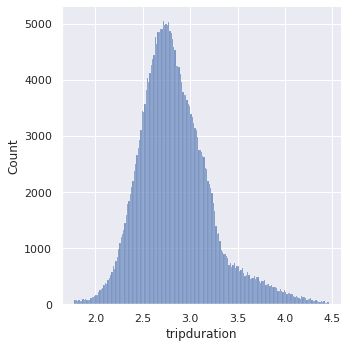

In [ ]:
sns.displot(np.log10(df_trip['tripduration']))
plt.show()

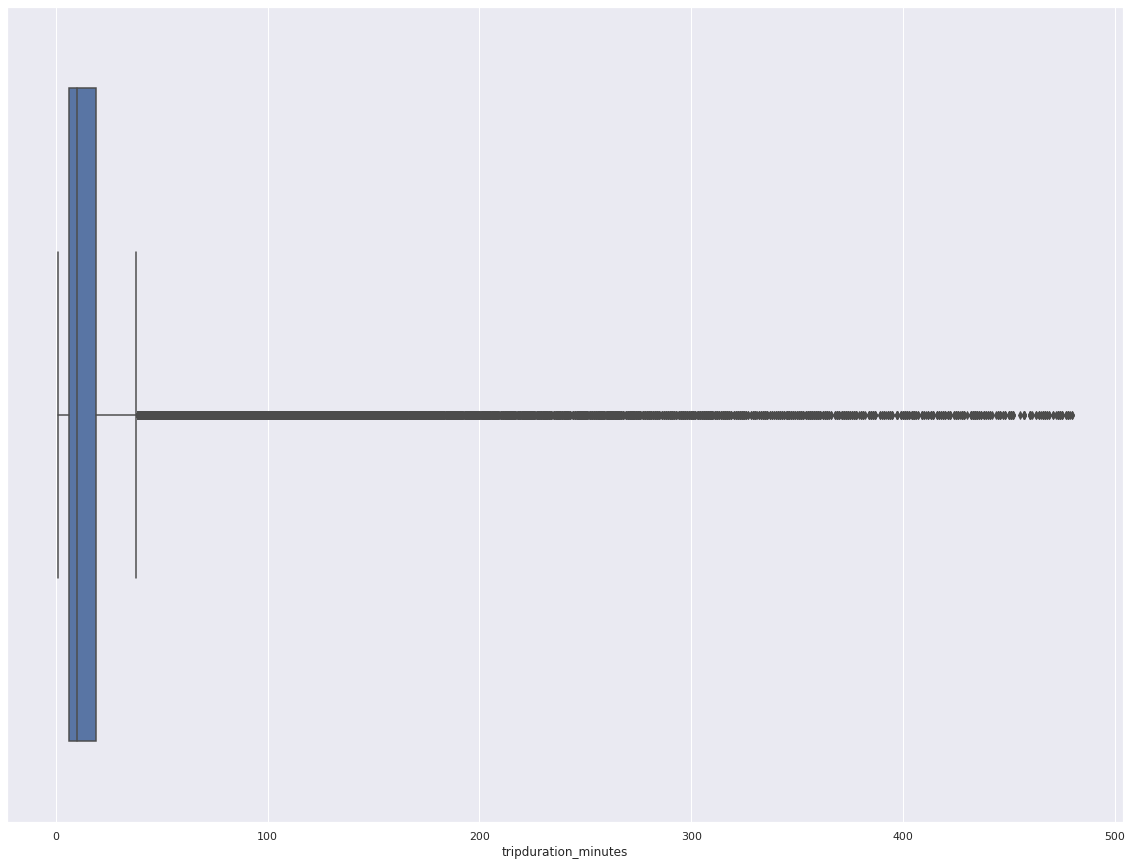

In [ ]:
plt.figure(figsize=(20, 15))
sns.boxplot(df_trip['tripduration_minutes'], data = df_trip)
plt.show()

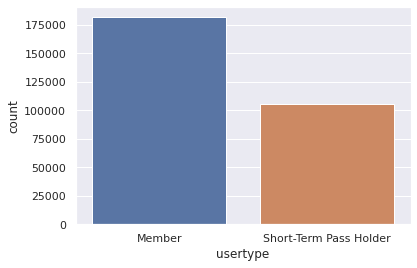

In [ ]:
sns.countplot(df_trip['usertype'])
plt.show()

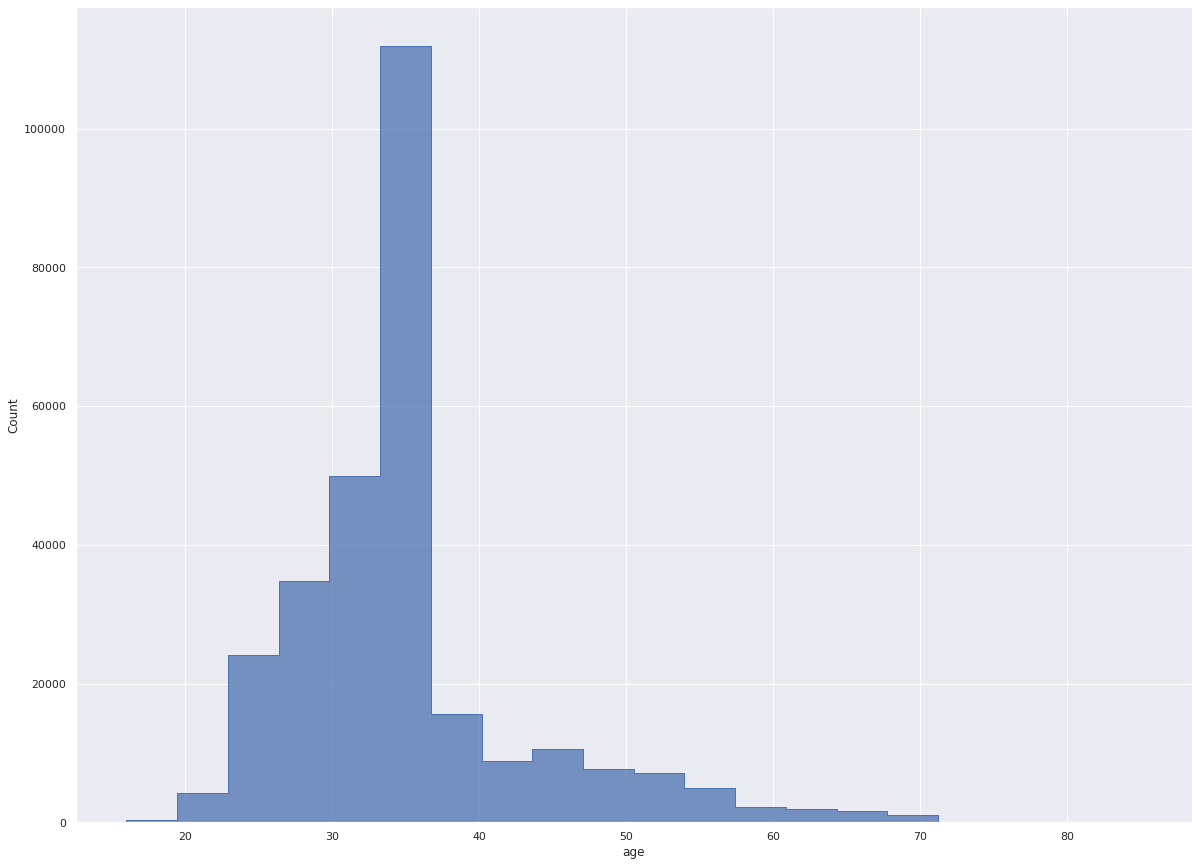

In [ ]:
fig, ax = plt.subplots(figsize=(20,15));
sns.histplot(df_trip['age'], bins = 20, element = 'step', ax = ax)
plt.show()

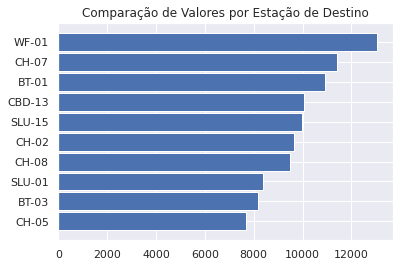

In [ ]:
axis_y = top_10_from['Count']
axis_x = top_10_from['Id']

fig, ax = plt.subplots()

ax.barh(axis_x, axis_y, 0.9)
ax.invert_yaxis() 
ax.set_title('Comparação de Valores por Estação de Destino')

plt.show()

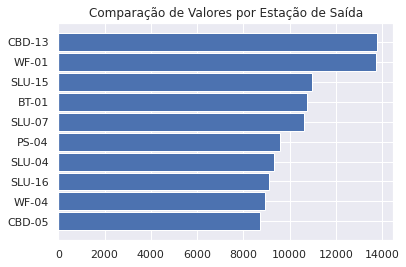

In [ ]:
axis_y = top_10_to['Count']
axis_x = top_10_to['Id']

fig, ax = plt.subplots()

ax.barh(axis_x, axis_y, 0.9)
ax.invert_yaxis() 
ax.set_title('Comparação de Valores por Estação de Saída')

plt.show()

In [ ]:
top_10_total_current_dockcount = df_station[['station_id','current_dockcount']].sort_values(by = ['current_dockcount'], ascending=False).head(10)

In [ ]:
top_10_total_current_dockcount['is_top'] = top_10_total_current_dockcount['station_id'].isin(top_10_from['Id'])

In [ ]:
top_10_total_current_dockcount

,station_id,current_dockcount,is_top
17,CH-08,26,True
22,DPD-03,24,False
52,WF-01,24,True
12,CH-02,20,True
41,SLU-21,20,False
31,SLU-01,20,True
35,SLU-15,20,True
36,SLU-16,20,False
40,SLU-20,20,False
27,FH-04,20,False


Notamos que apenas 5 das estações com mais docas são as mais utilizadas, esse é um ponto a se verificar se não é valido efetuar um remanejamento.

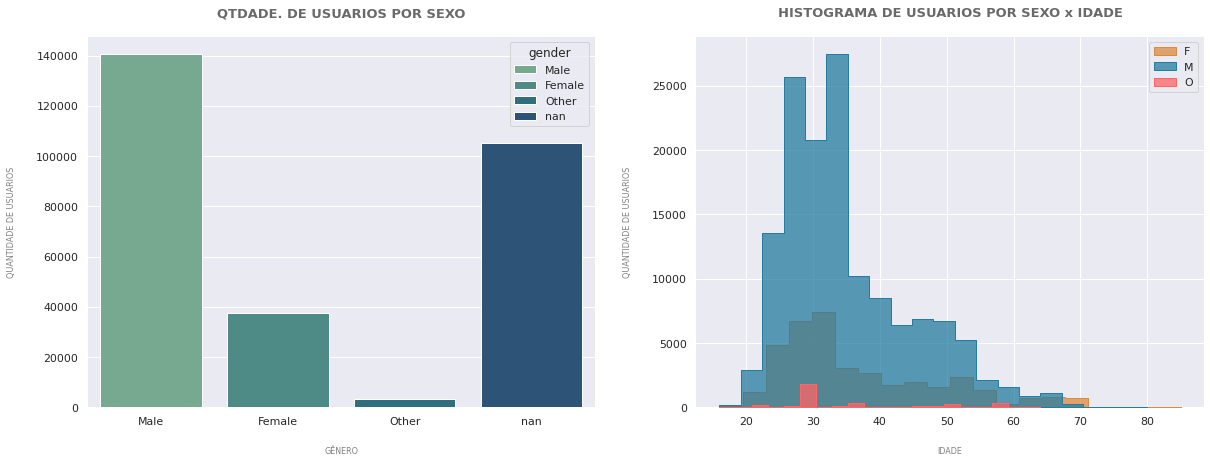

In [ ]:
plt.figure(figsize=(20, 15))
s1 = plt.subplot(2, 2, 1)

s1 = sns.countplot(x = 'gender', data = df_trip,
                    palette = 'crest', hue = 'gender', dodge = False
                   )
s1 = plt.title('QTDADE. DE USUARIOS POR SEXO',
               pad = 20,
         fontsize = 13, color ='dimgrey', fontweight = 'bold')

s1 = sns.despine(bottom = True, left=True)
s1 = plt.xlabel('GÊNERO', color = 'grey', labelpad = 20, fontsize = 8)
s1 = plt.ylabel('QUANTIDADE DE USUARIOS', color = 'grey', labelpad = 20, fontsize = 8)


s2 = plt.subplot(2, 2, 2)

sns.histplot(df_trip[df_trip['gender'] == 'Female']['age'], bins = 20, label = 'F', element = 'step',
             color = '#da8b40')
sns.histplot(df_trip[df_trip['gender'] == 'Male']['age'], bins = 20, label = 'M', element = 'step',
             color = '#257ca0')
sns.histplot(df_trip[df_trip['gender'] == 'Other']['age'], bins = 20, label = 'O', element = 'step',
             color = '#FF6666')


s2 = plt.title('HISTOGRAMA DE USUARIOS POR SEXO x IDADE',
               pad = 20,
         fontsize = 13, color ='dimgrey', fontweight = 'bold')

s2 = sns.despine(bottom = True, left=True)
s2 = plt.xlabel('IDADE', color = 'grey', labelpad = 20, fontsize = 8)
s2 = plt.ylabel('QUANTIDADE DE USUARIOS', color = 'grey', labelpad = 20, fontsize = 8)
s2 = plt.legend()


Podemos identificar com as informações acima que a maioria dos nossos clientes estão entre 30 e 40 anos e que a quantidade de pessoas de sexo masculino são as que mais usam as bicicletas (talvez por questões de vestimentas) mesmo considerando que temos alguns missing values feature "gender"

In [ ]:
print('Media de Duração de Viagens - Mulheres: {} '.format(round(df_trip.query('gender == "Female"')['tripduration_minutes'].mean()), 2))
print('Media de Duração de Viagens - Homens: {} '.format(round(df_trip.query('gender == "Male"')['tripduration_minutes'].mean()), 2))
print('Media de Duração de Viagens - Outro: {} '.format(round(df_trip.query('gender == "Other"')['tripduration_minutes'].mean()), 2))

Media de Duração de Viagens - Mulheres: 12 
Media de Duração de Viagens - Homens: 9 
Media de Duração de Viagens - Outro: 10 


Podemos identificar que mulheres usam menos mas as suas viagens tem durações em média maiores que dos homens

In [ ]:
df_trip.groupby('from_station_id')['tripduration_minutes'].sum()

from_station_id
8D OPS 02         5.0
BT-01        254433.0
BT-03        138256.0
BT-04         70500.0
BT-05        125383.0
               ...   
UW-10         46832.0
UW-11         22157.0
WF-01        453955.0
WF-03          8278.0
WF-04        236076.0
Name: tripduration_minutes, Length: 61, dtype: float64

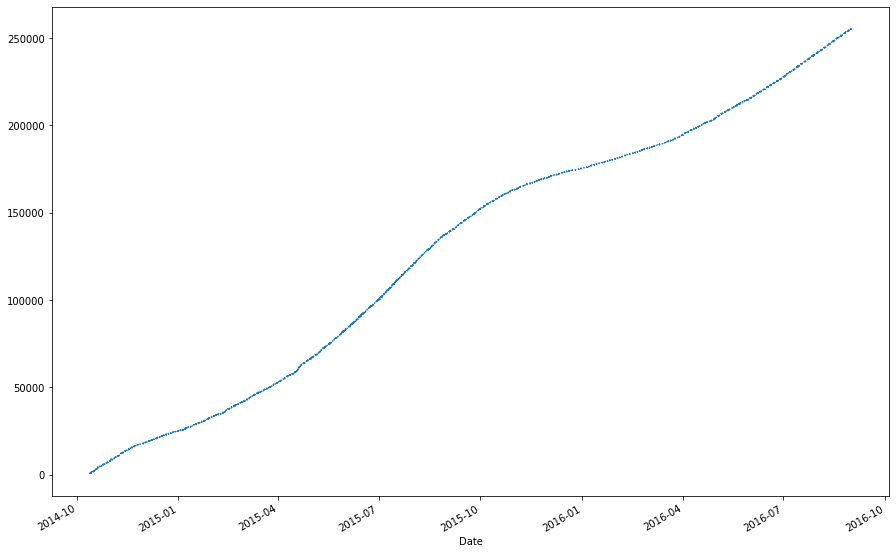

In [ ]:
plt.figure(figsize=(15, 10))
df_trip_date['trip_id'].plot(style=':');

Por fim podemos identificar também que com o passar do tempo a utilização das bicicletas como meio de transporte aumentaram